In [1]:
# Loading Dataset
import pandas as pd
import numpy as np

#EDA
from collections import Counter
import ydata_profiling as pp

# Pre-processing
from sklearn.preprocessing import StandardScaler

# Data splitting
from sklearn.model_selection import train_test_split

# Model Selection
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation Metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

# Visualisations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# To remove unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("heart.csv")
X = data.iloc[:, :-1]
y = data.iloc[:,-1]

In [3]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [4]:
data.shape

(1025, 14)

## Exploratory Data Analysis (EDA)

### Understanding the columns

In [5]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(data.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [6]:
X.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [7]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## EDA

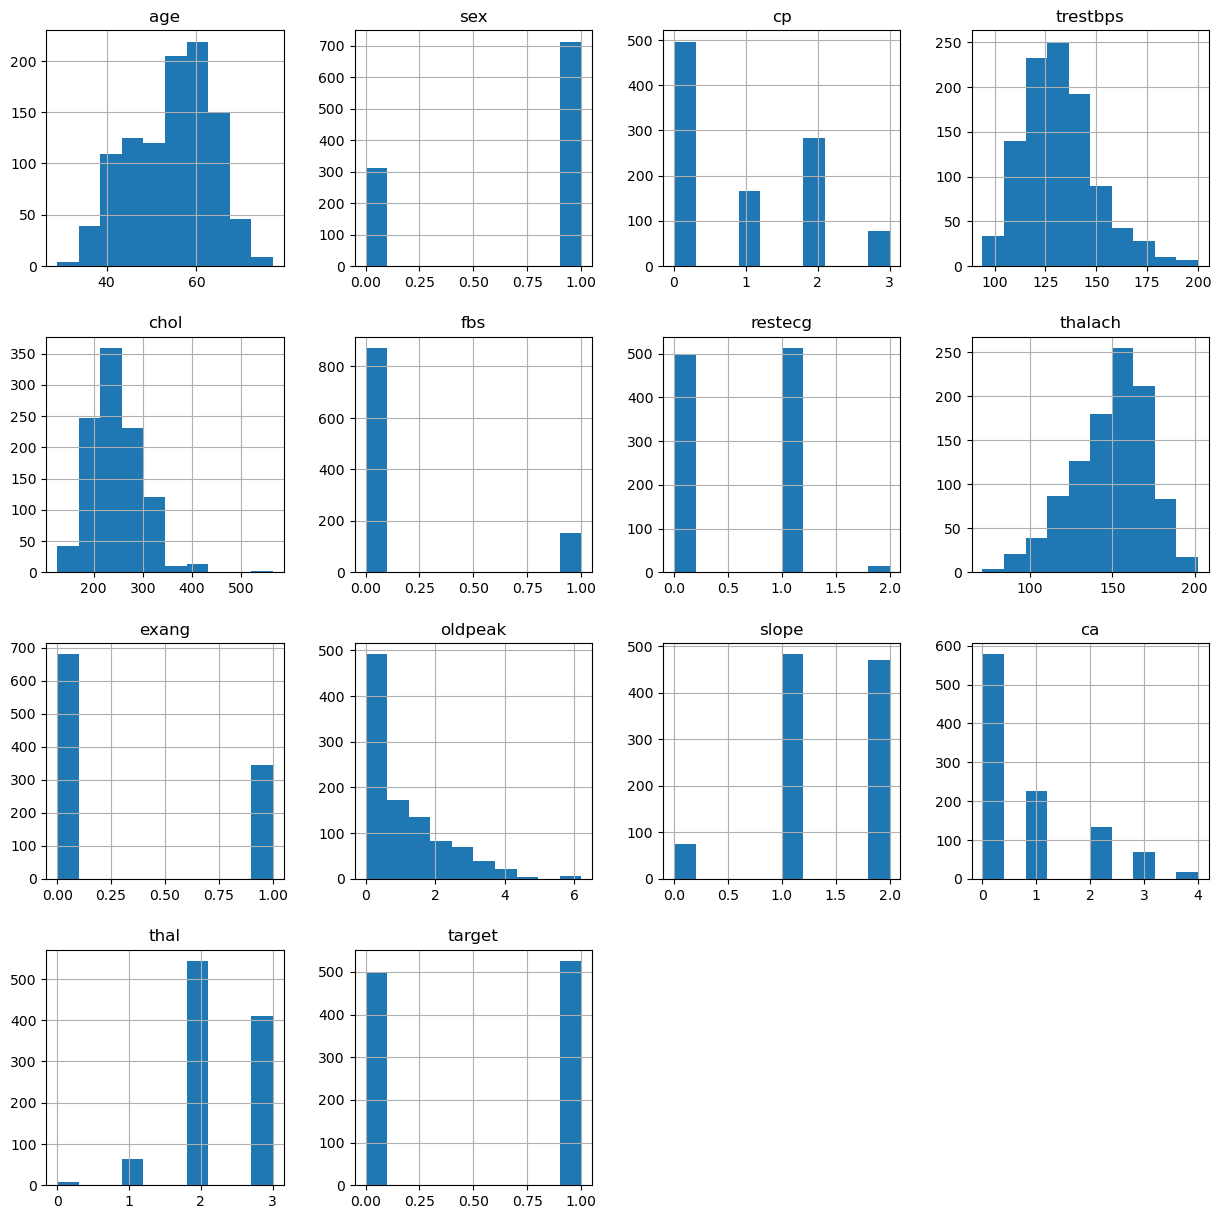

In [8]:
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
g = data.hist(ax=ax)

### Pairplot of the variables based on Target

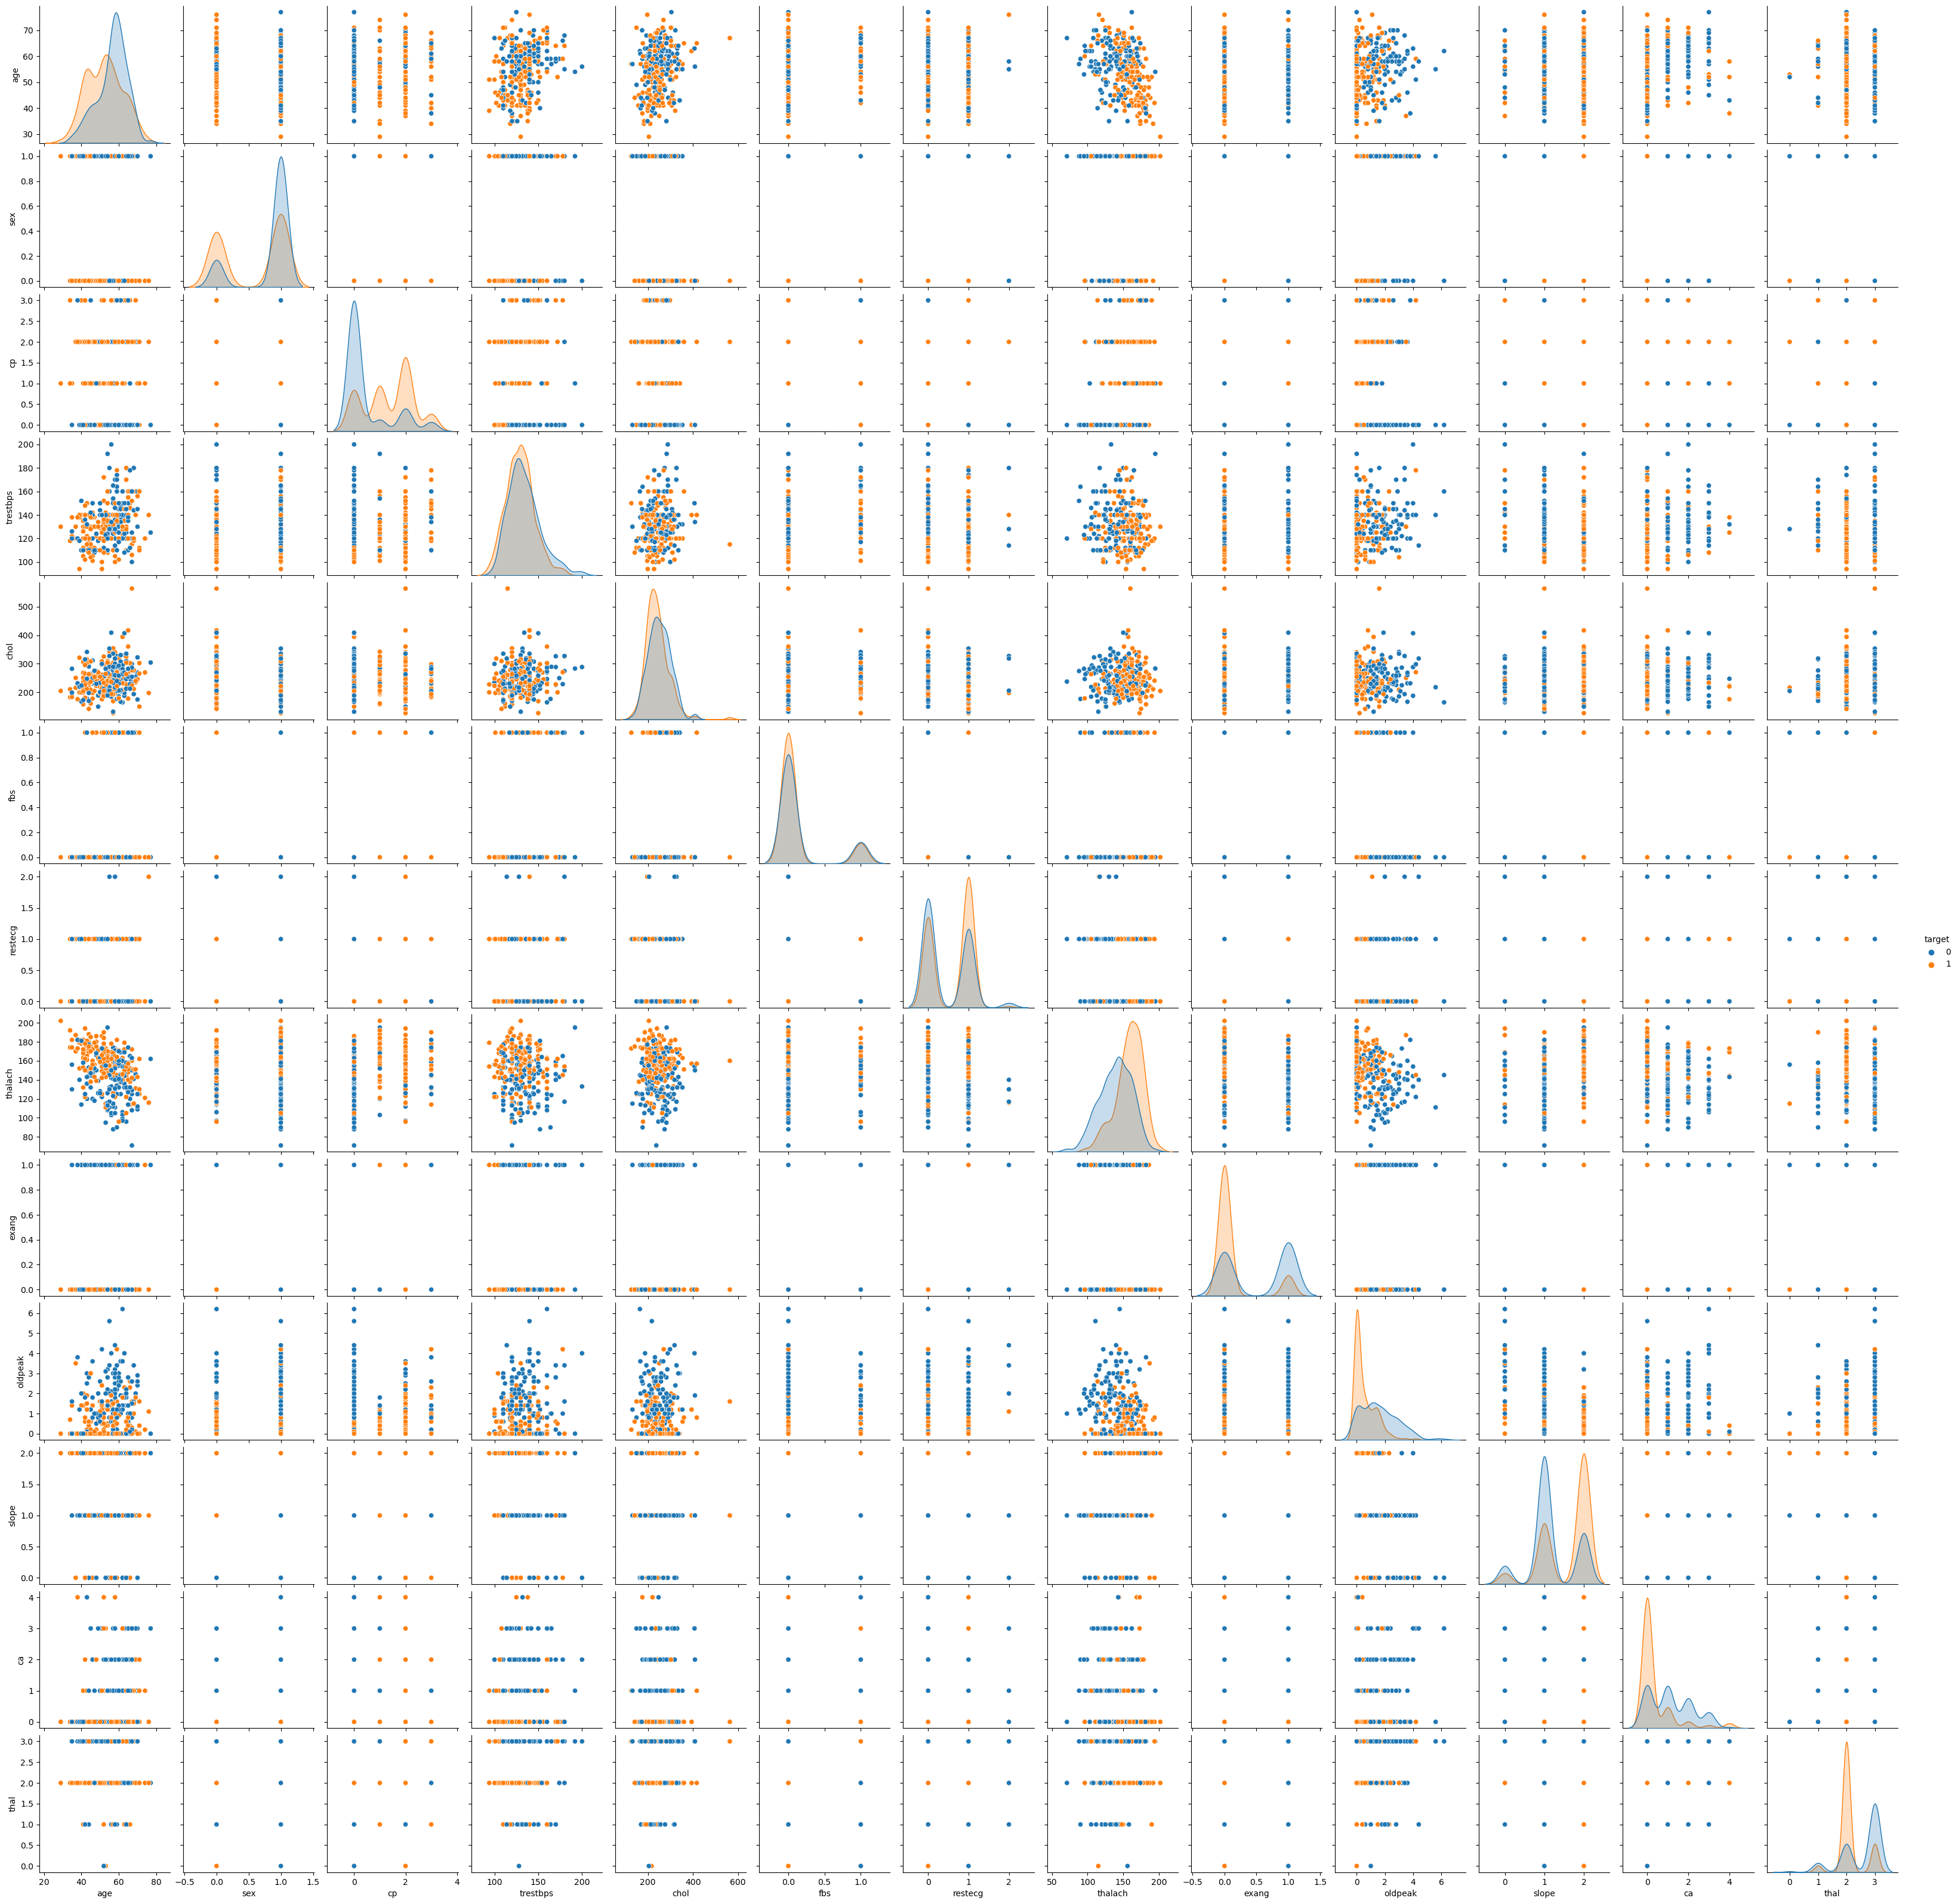

In [9]:
sns.pairplot(data,hue='target')

### Count of the number of patients with diseases vs with no diseases

<Axes: xlabel='target', ylabel='count'>

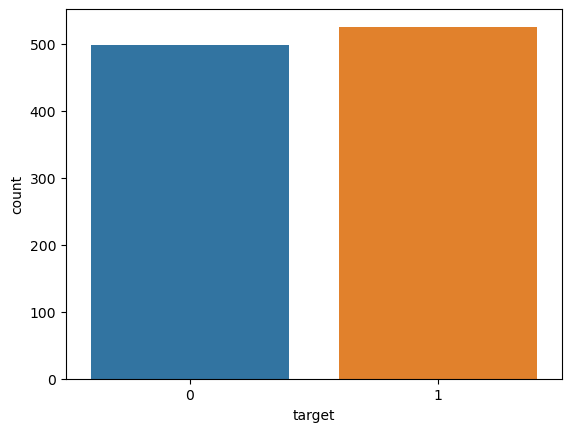

In [10]:
sns.countplot(x='target', data = data)

### Pie chart showing the percentage of male patients vs female

<Axes: ylabel='count'>

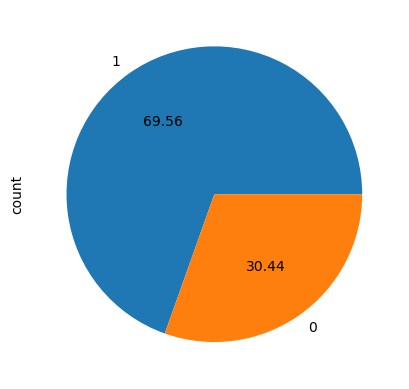

In [11]:
data['sex'].value_counts().plot.pie(autopct='%.2f')

### Chest pain type based on Target variable

<Axes: xlabel='cp', ylabel='age'>

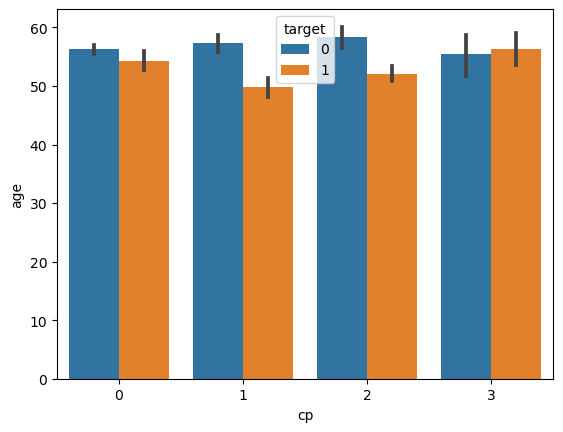

In [12]:
sns.barplot(y='age',x='cp',data=data,hue='target')

## Get correlation of all the features of the dataset

<Axes: >

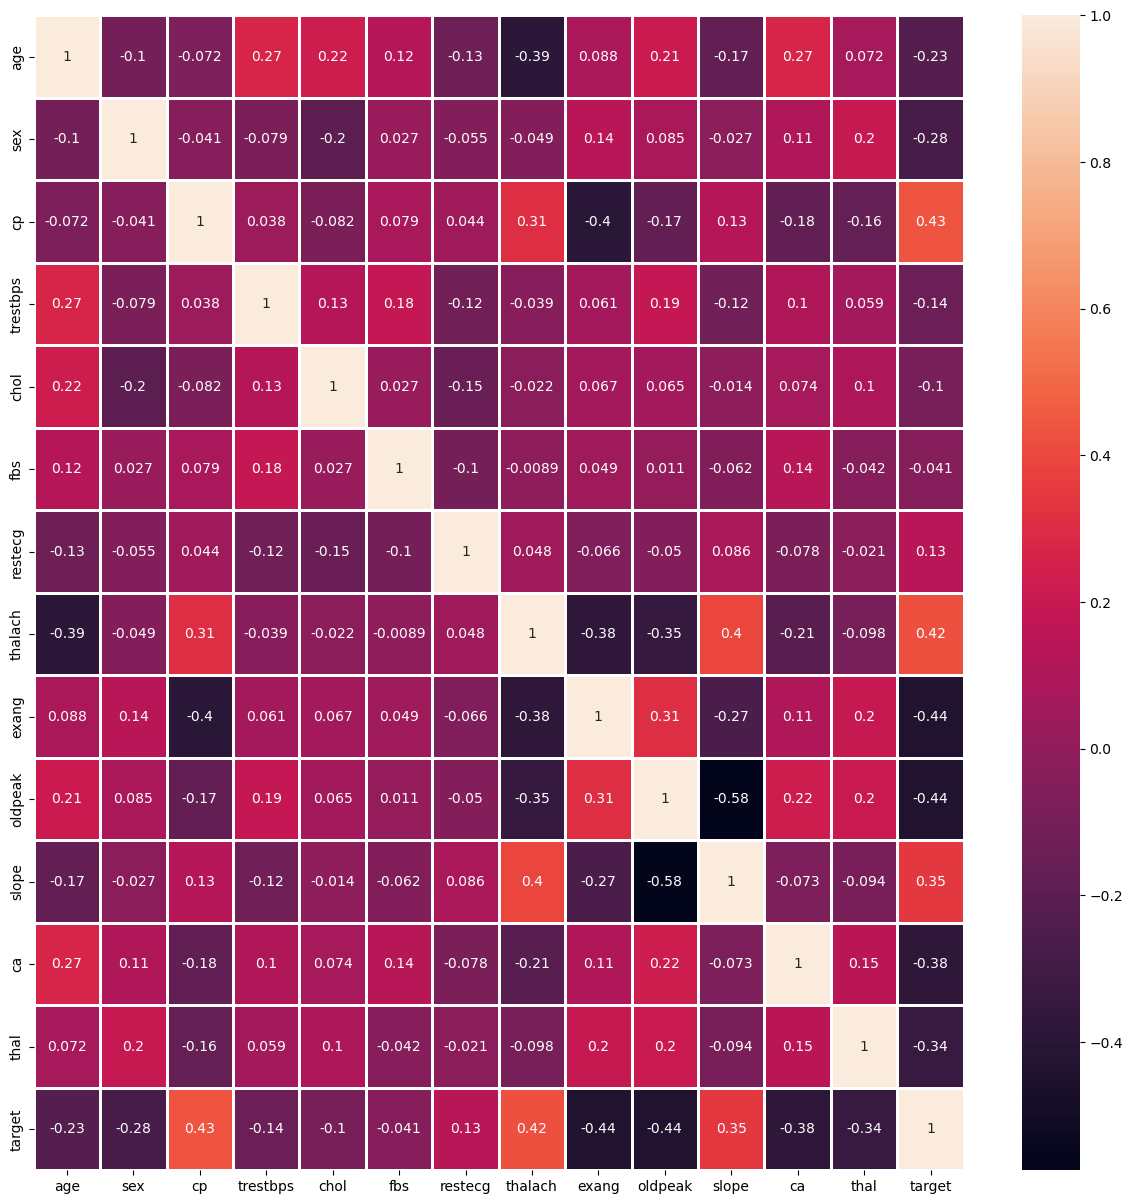

In [13]:
corr=data.corr()
plt.figure(figsize= (15,15))
sns.heatmap(corr, linewidth=1,annot=True,linecolor='white')

## Pre-Processing and Data splitting

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Feature Scaling

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
#print(X_test)


## Logistic Regression

In [16]:
from sklearn.linear_model import  LogisticRegression

In [17]:
lr=LogisticRegression()
model_lr=lr.fit(X_train, y_train)
pred_lr = model_lr.predict(X_test)

Confusion Matrix   : [[112  47]
 [ 16 133]]
Accuracy   : 0.7954545454545454
Precision : 0.7388888888888889
Recall    : 0.8926174496644296
F1-score  : 0.8085106382978723


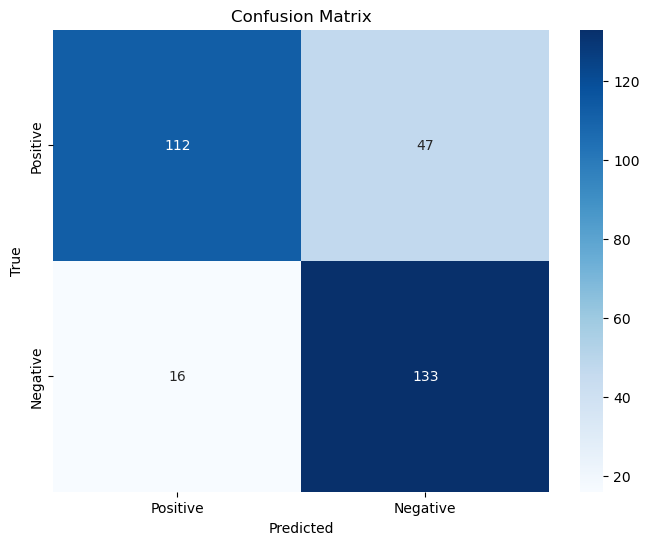

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm_lr=confusion_matrix(y_test,pred_lr)
print("Confusion Matrix   :", cm_lr)
accuracy_lr = accuracy_score(y_test, pred_lr)
print("Accuracy   :", accuracy_lr)
precision_lr = precision_score(y_test, pred_lr)
print("Precision :", precision_lr)
recall_lr = recall_score(y_test, pred_lr)
print("Recall    :", recall_lr)
F1_score_lr = f1_score(y_test, pred_lr)
print("F1-score  :", F1_score_lr)

# Define class labels
class_names = ['Positive', 'Negative']

# Plot confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Random Classifier

In [19]:
from sklearn.ensemble import RandomForestClassifier

In [20]:
rf = RandomForestClassifier(n_estimators=300, random_state=42, max_depth=5)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

Confusion Matrix   : [[128  31]
 [  8 141]]
Accuracy   : 0.8733766233766234
Precision : 0.8197674418604651
Recall    : 0.9463087248322147
F1-score  : 0.8785046728971962


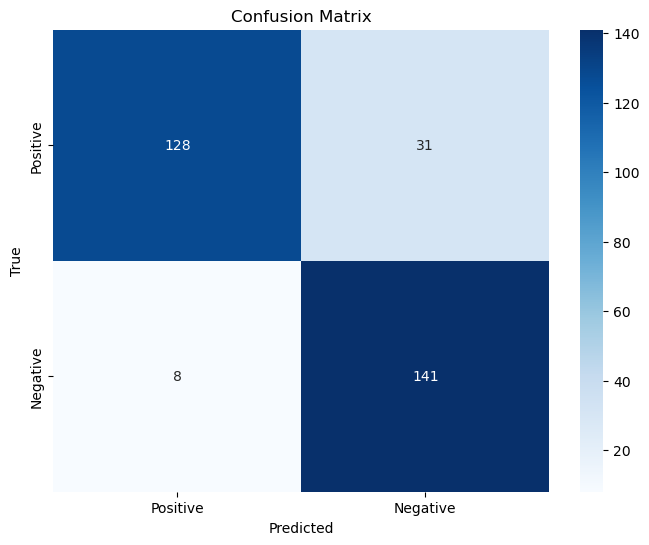

In [21]:
cm_rf=confusion_matrix(y_test,pred_rf)
print("Confusion Matrix   :", cm_rf)
accuracy_rf = accuracy_score(y_test, pred_rf)
print("Accuracy   :", accuracy_rf)
precision_rf = precision_score(y_test, pred_rf)
print("Precision :", precision_rf)
recall_rf = recall_score(y_test, pred_rf)
print("Recall    :", recall_rf)
F1_score_rf = f1_score(y_test, pred_rf)
print("F1-score  :", F1_score_rf)

# Define class labels
class_names = ['Positive', 'Negative']

# Plot confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


## Support Vector Machine (SVM)


In [22]:
from sklearn.svm import SVC

In [23]:
svc =  SVC(C=2)
svc.fit(X_train, y_train)
pred_svm = svc.predict(X_test)

Confusion Matrix   : [[142  17]
 [  7 142]]
Accuracy   : 0.922077922077922
Precision : 0.8930817610062893
Recall    : 0.9530201342281879
F1-score  : 0.922077922077922


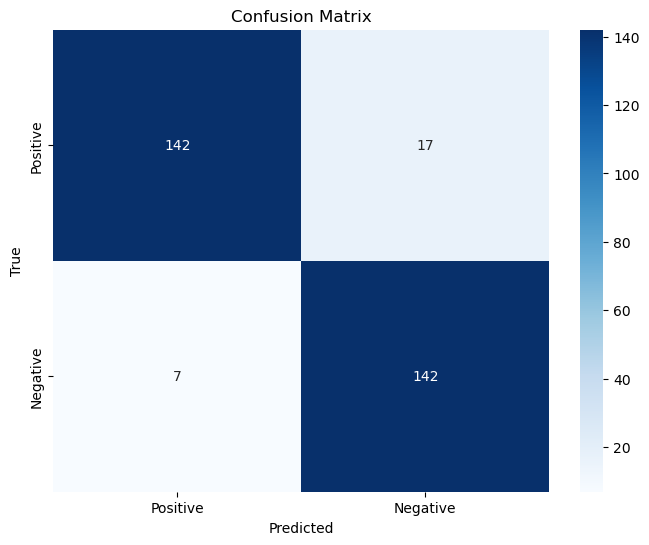

In [24]:
cm_svm=confusion_matrix(y_test,pred_svm)
print("Confusion Matrix   :", cm_svm)
accuracy_svm = accuracy_score(y_test, pred_svm)
print("Accuracy   :", accuracy_svm)
precision_svm = precision_score(y_test, pred_svm)
print("Precision :", precision_svm)
recall_svm = recall_score(y_test, pred_svm)
print("Recall    :", recall_svm)
F1_score_svm = f1_score(y_test, pred_svm)
print("F1-score  :", F1_score_svm)

# Define class labels
class_names = ['Positive', 'Negative']

# Plot confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

## Forming the results of various models

### Logistic Regression

In [25]:
result1 = ["1.","Logistic Regression"]
result1.append(round(accuracy_lr*100,2))
result1.append(round(precision_lr*100,2))
result1.append(round(recall_lr*100,2))
result1.append(round(F1_score_lr*100,2)) 

### Random Forest Classifier

In [26]:
result2 = ["2.","Random Forest Classifier"]
result2.append(round(accuracy_rf*100,2))
result2.append(round(precision_rf*100,2))
result2.append(round(recall_rf*100,2))
result2.append(round(F1_score_rf*100,2))

### Support Vector Machine

In [27]:
result3 = ["3.","Support Vector Machine"]
result3.append(round(accuracy_svm*100,2))
result3.append(round(precision_svm*100,2))
result3.append(round(recall_svm*100,2))
result3.append(round(F1_score_svm*100,2)) 

### Result Table

In [30]:
from prettytable import PrettyTable
Result_table = PrettyTable(["S.No.","Model","Accuracy","Precison","Recall","F1 Score"])
Result_table.add_row(result1)
Result_table.add_row(result2)
Result_table.add_row(result3)
print(Result_table)

+-------+--------------------------+----------+----------+--------+----------+
| S.No. |          Model           | Accuracy | Precison | Recall | F1 Score |
+-------+--------------------------+----------+----------+--------+----------+
|   1.  |   Logistic Regression    |  79.55   |  73.89   | 89.26  |  80.85   |
|   2.  | Random Forest Classifier |  87.34   |  81.98   | 94.63  |  87.85   |
|   3.  |  Support Vector Machine  |  92.21   |  89.31   |  95.3  |  92.21   |
+-------+--------------------------+----------+----------+--------+----------+


In [74]:
print("Enter the all Information")
a = int(input("Enter the age:"))
s = int(input("Enter the gender, 1 for male, 0 for female"))
cp = int(input("Enter the chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic"))
bp = int(input("Enter the resting blood pressure"))
ch = int(input("Enter the serum cholestoral in mg/dl"))
fs = int(input("Enter the fasting blood sugar in mg/dl"))
ecg = int(input("Enter the resting electrocardiographic results (values 0,1,2)"))
hr = int(input("Enter the maximum heart rate achieved"))
ex = int(input("Enter the exercise induced angina"))
op = float(input("Enter the ST depression induced by exercise relative to rest"))
sl = int(input("Enter the slope of the peak exercise ST segment"))
ca = int(input("Enter the number of major vessels (0-3) colored by flourosopy"))
th = int(input("Enter the thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"))
t = int(input())

Enter the all Information
Enter the age:54
Enter the gender, 1 for male, 0 for female1
Enter the chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic0
Enter the resting blood pressure122
Enter the serum cholestoral in mg/dl286
Enter the fasting blood sugar in mg/dl0
Enter the resting electrocardiographic results (values 0,1,2)0
Enter the maximum heart rate achieved116
Enter the exercise induced angina1
Enter the ST depression induced by exercise relative to rest3.2
Enter the slope of the peak exercise ST segment1
Enter the number of major vessels (0-3) colored by flourosopy2
Enter the thal: 3 = normal; 6 = fixed defect; 7 = reversable defect2
0


In [ ]:
features = [[a, s, cp, bp, ch, fs, ecg, hr, ex, op, sl, ca, th]]
while(1):
    i = int(input("What Algorithm you use to see the result:\n1. Logistic Regreesion \n2. Random Forest Algorithm\n3. Support Vector Machine\n4. Exit "))
    lg = -1
    if i==1:
        lg = model_lr.predict(features)
    elif i==2:
        lg =  rf.predict(features)
    elif i==3:
        lg = svc.predict(features)
    else: 
        break
    if t == 0: 
            print("No heart disease")
        #print("no heart disease")
    elif t == 1:
            print("Has heart disease")
    elif lg == -1:
        print("Can not detect")

What Algorithm you use to see the result:
1. Logistic Regreesion 
2. Random Forest Algorithm
3. Support Vector Machine
4. Exit 1
No heart disease
What Algorithm you use to see the result:
1. Logistic Regreesion 
2. Random Forest Algorithm
3. Support Vector Machine
4. Exit 2
No heart disease
What Algorithm you use to see the result:
1. Logistic Regreesion 
2. Random Forest Algorithm
3. Support Vector Machine
4. Exit 3
No heart disease


In [37]:
print("Hi")

Hi
